In [78]:
import numpy as np
import pandas as pd
# Veriyi yükle
df = pd.read_csv("temizlenmis_veri.csv")

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Hedef değişken ve özellikler
X = df.drop(columns=['survival_status'])
y = df['survival_status']
# "survival time" sütununu sil
if 'survival time' in df.columns:
    df = df.drop(columns=['survival time'])

# '?' karakterlerini NaN yap
X = df.drop(columns=['survival_status']).replace('?', pd.NA)
y = df['survival_status']

X = pd.get_dummies(X)

# Eksik verileri ortalama ile dolduralım
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Verileri ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN modeli
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = knn_model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN doğruluk oranı: %{accuracy * 100:.2f}")


KNN doğruluk oranı: %71.05


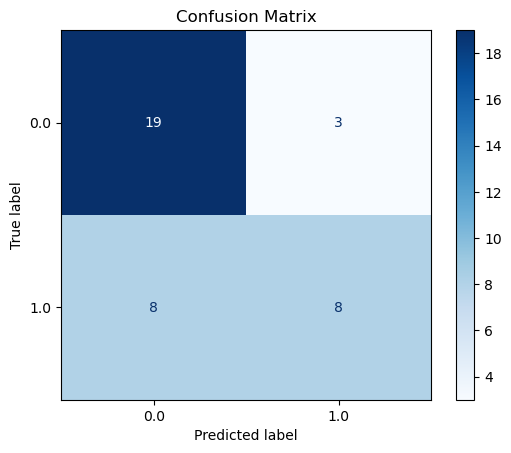

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [88]:
import pickle
# Modeli pickle ile kaydet
save_data = {
    'model': knn_model,
    'feature_names': X.columns.tolist()
}
# Modeli kaydet
with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(save_data, f)